## 1. Read the dataset

In [1]:
import pandas as pd

train_data_original = pd.read_csv("basket_data_by_date_train.csv")
test_data_original = pd.read_csv("basket_data_by_date_test.csv")

Check the structure and content of the dataset

In [2]:
print("Train Data Info:")
print(train_data_original.info())

print("\nTest Data Info:")
print(test_data_original.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BillNo      40000 non-null  int64  
 1   Itemname    40000 non-null  object 
 2   Quantity    40000 non-null  int64  
 3   Date        40000 non-null  object 
 4   Price       40000 non-null  float64
 5   CustomerID  40000 non-null  int64  
 6   cost        40000 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 2.1+ MB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BillNo      10000 non-null  float64
 1   Itemname    10000 non-null  object 
 2   Quantity    10000 non-null  float64
 3   Date        10000 non-null  object 
 4   Price       10000 non-null  float64
 5   CustomerID  10000 non-

In [3]:
test_data_original.describe()

,BillNo,Quantity,Price,CustomerID,cost
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,545209.692000,3.672100,3.971454,15433.082900,11.840678
std,492.638789,2.639788,6.777596,1616.660727,13.086198
min,544398.000000,1.000000,0.160000,12352.000000,0.190000
25%,544795.000000,2.000000,1.650000,14227.000000,3.750000
50%,545181.000000,3.000000,2.950000,15358.000000,9.900000
75%,545664.000000,6.000000,4.950000,16931.000000,16.500000
max,546084.000000,10.000000,195.000000,18283.000000,290.000000


In [4]:
train_data_original.describe()

,BillNo,Quantity,Price,CustomerID,cost
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,540254.879225,3.487700,3.732165,15577.606525,11.097411
std,2380.444952,2.611766,5.711630,1730.347123,13.298301
min,536365.000000,1.000000,0.100000,12347.000000,0.140000
25%,538093.000000,1.000000,1.650000,14224.000000,3.300000
50%,540373.000000,2.000000,2.950000,15570.000000,7.950000
75%,542360.000000,6.000000,4.650000,17220.000000,15.800000
max,544398.000000,10.000000,295.000000,18283.000000,527.700000


In [5]:
negative_quantity_test = test_data_original[test_data_original['Quantity'] < 0]
print(negative_quantity_test)

Empty DataFrame
Columns: [BillNo, Itemname, Quantity, Date, Price, CustomerID, cost]
Index: []


In [6]:
negative_quantity_train = train_data_original[train_data_original['Quantity'] < 0]
print(negative_quantity_train)

Empty DataFrame
Columns: [BillNo, Itemname, Quantity, Date, Price, CustomerID, cost]
Index: []



Based on the information provided about the data, it can be seen that both the training and test sets contain seven columns, which are:

BillNo, Itemname, Quantity, Date, Price, CustomerID, cost

## 2. Pre-process the data

#### 2.1 Clean the missing value

In [7]:
# check if there are missing values in the train set
print("Train Data Missing Values:")
print(train_data_original.isnull().sum())

# check if there are missing values in the test set
print("\nTest Data Missing Values:")
print(test_data_original.isnull().sum())

Train Data Missing Values:
BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
cost          0
dtype: int64

Test Data Missing Values:
BillNo        30000
Itemname      30000
Quantity      30000
Date          30000
Price         30000
CustomerID    30000
cost          30000
dtype: int64


The data shows that the dataset of Test Data contains a large number of missing values, which is 30,000 in number. So I will deal with these missing values.

In [8]:
test_data_original.tail(20)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,cost
39980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39981,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39982,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39984,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39987,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39988,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39989,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From here we can see that the missing values are all at the tail of the dataset. So I'm going to delete all the data after 10000.

In [9]:
# 删除从第10001行开始的缺失值
test_data_clean = test_data_original.iloc[:10000]

# 检查删除缺失值后的数据集大小
print("The size after cleaned the missing values", test_data_clean.shape)

The size after cleaned the missing values (10000, 7)


See if there is any missing values at the end of the dataset

In [10]:
test_data_clean.tail(10)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,cost
9990,546084.0,JUMBO STORAGE BAG SKULLS,10.0,9/03/2011 11:28,1.95,14112.0,19.50
9991,546084.0,SET 3 SONG BIRD PAPER EGGS ASSORTED,6.0,9/03/2011 11:28,2.95,14112.0,17.70
9992,546084.0,COFFEE MUG APPLES DESIGN,6.0,9/03/2011 11:28,2.55,14112.0,15.30
9993,546084.0,RED RETROSPOT SMALL MILK JUG,6.0,9/03/2011 11:28,2.55,14112.0,15.30
9994,546084.0,JUMBO BAG RED RETROSPOT,10.0,9/03/2011 11:28,1.95,14112.0,19.50
9995,546084.0,EASTER TIN CHICKS PINK DAISY,6.0,9/03/2011 11:28,1.65,14112.0,9.90
9996,546084.0,CREAM CUPID HEARTS COAT HANGER,4.0,9/03/2011 11:28,4.15,14112.0,16.60
9997,546084.0,RED RETROSPOT BOWL,8.0,9/03/2011 11:28,1.25,14112.0,10.00
9998,546084.0,RED RETROSPOT CAKE STAND,1.0,9/03/2011 11:28,10.95,14112.0,10.95
9999,546084.0,RED RETROSPOT CHARLOTTE BAG,10.0,9/03/2011 11:28,0.85,14112.0,8.50


In [11]:
test_data_clean.describe()

,BillNo,Quantity,Price,CustomerID,cost
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,545209.692000,3.672100,3.971454,15433.082900,11.840678
std,492.638789,2.639788,6.777596,1616.660727,13.086198
min,544398.000000,1.000000,0.160000,12352.000000,0.190000
25%,544795.000000,2.000000,1.650000,14227.000000,3.750000
50%,545181.000000,3.000000,2.950000,15358.000000,9.900000
75%,545664.000000,6.000000,4.950000,16931.000000,16.500000
max,546084.000000,10.000000,195.000000,18283.000000,290.000000


In [12]:
test_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BillNo      10000 non-null  float64
 1   Itemname    10000 non-null  object 
 2   Quantity    10000 non-null  float64
 3   Date        10000 non-null  object 
 4   Price       10000 non-null  float64
 5   CustomerID  10000 non-null  float64
 6   cost        10000 non-null  float64
dtypes: float64(5), object(2)
memory usage: 547.0+ KB


Now we can see the missing values that are in the test_data_original dataset has successfully removed.

Because in the first part, I have checked that if the dataset contains any quantity of values < 0. The result shows that no value is below 0, which is reasonable, so we don't need to deal with it.

#### 2.2 Remove not related columns

Since we are using collaborative filtering to generate system recommendations. It mainly rely on users' ratings or behaviors of items. 'BillNo', 'Date', 'Price' and 'Cost' are not very useful to us, because these features do not provide information related to user behavior. Thus, I will remove these columns.

In [13]:
# 删除指定的列
train_data = train_data_original.drop(columns=['BillNo', 'Date', 'Price', 'cost'])
test_data = test_data_clean.drop(columns=['BillNo', 'Date', 'Price', 'cost'])

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Itemname    40000 non-null  object
 1   Quantity    40000 non-null  int64 
 2   CustomerID  40000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 937.6+ KB


In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Itemname    10000 non-null  object 
 1   Quantity    10000 non-null  float64
 2   CustomerID  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


#### 2.3 Visualization
我将在这里计算每个产品的总销量，然后根据销量将许排列，可视化最受欢迎的10个商品

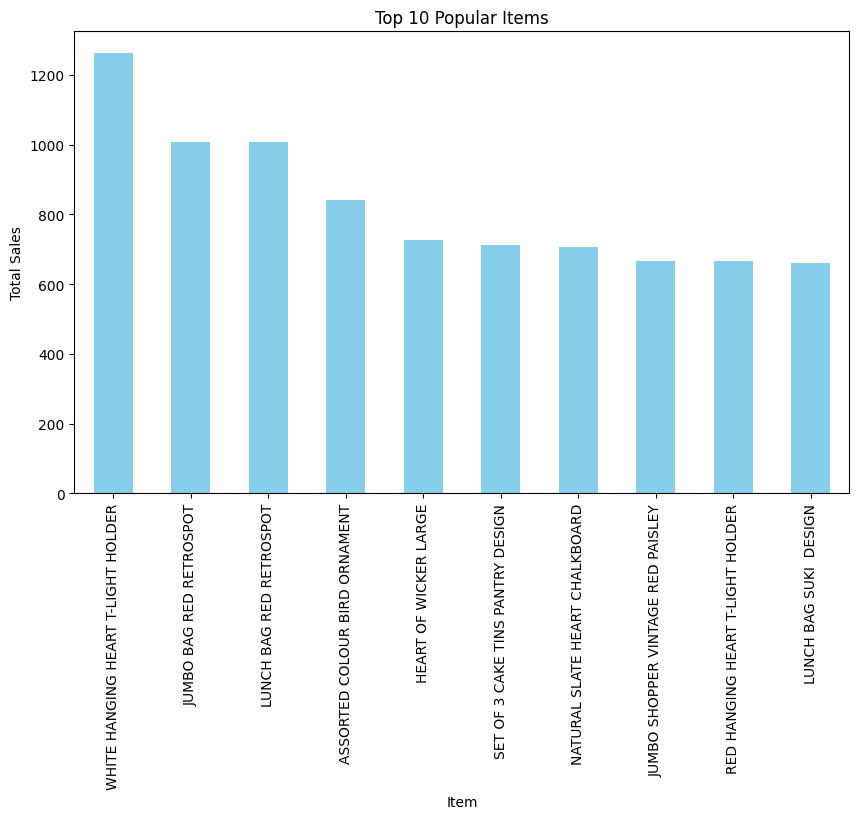

In [16]:
import matplotlib.pyplot as plt

# 计算每个产品的总销量
item_sales = train_data.groupby('Itemname')['Quantity'].sum()

# 根据销量降序排列，选择前十个产品
top_10_items = item_sales.sort_values(ascending=False).head(10)

# 绘制柱状图
plt.figure(figsize=(10, 6))
top_10_items.plot(kind='bar', color='skyblue')
plt.title('Top 10 Popular Items')
plt.xlabel('Item')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


在这里我们列出最不受欢迎的产品

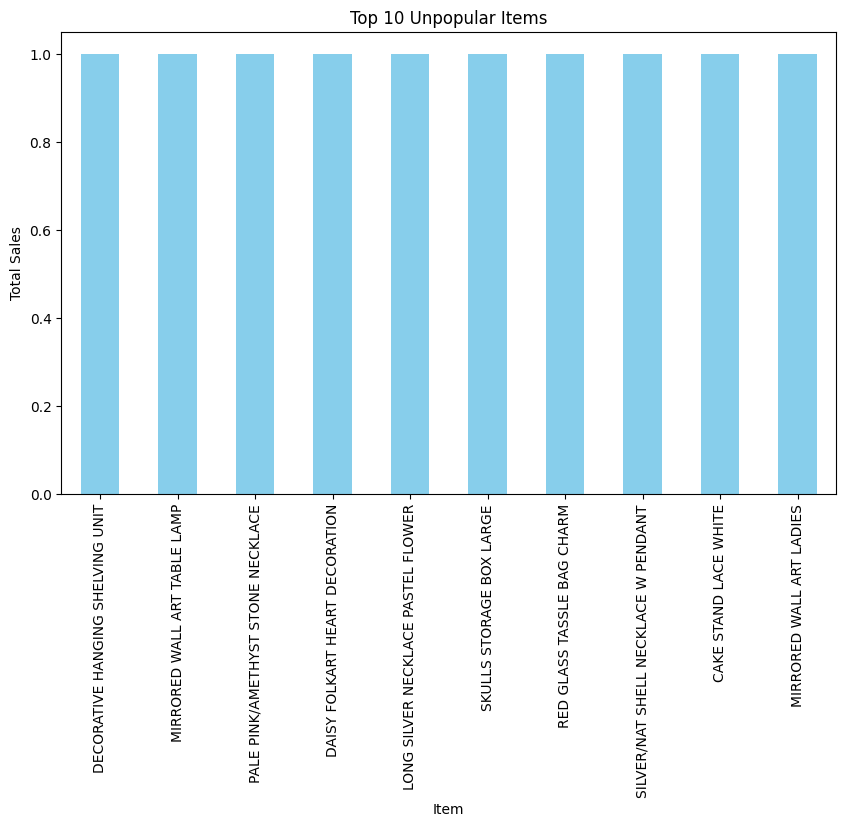

In [17]:
# 根据销量降序排列，选择前十个产品
less_10_items = item_sales.sort_values(ascending=True).head(10)

# 绘制柱状图
plt.figure(figsize=(10, 6))
less_10_items.plot(kind='bar', color='skyblue')
plt.title('Top 10 Unpopular Items')
plt.xlabel('Item')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


#### 2.4 customer-item matrix

Now I will convert the data into the form of customer-item matrix

In [18]:
len(train_data.CustomerID.unique()), len(train_data.Itemname.unique())

(1391, 2523)

User-based recommendation

In [19]:
# create a pivot dataframe with index as a userid and columns as a movieid

# 确定唯一的用户和项目标识符列表
unique_users = train_data['CustomerID'].unique()
unique_items = train_data['Itemname'].unique()

# 创建一个空的用户-项目矩阵
user_item_matrix = pd.DataFrame(index=unique_users, columns=unique_items)

# 遍历训练数据集，填充用户-项目矩阵
for index, row in train_data.iterrows():
    user_id = row['CustomerID']
    item_id = row['Itemname']
    rating = row['Quantity']
    user_item_matrix.loc[user_id, item_id] = rating

# 将缺失值填充为0
user_item_matrix.fillna(0, inplace=True)

# 仅打印前10行和前10列(因为如果全部打印的话文件会太大)
print(user_item_matrix.iloc[:10, :20].to_string())

       KNITTED UNION FLAG HOT WATER BOTTLE  GLASS STAR FROSTED T-LIGHT HOLDER  WHITE HANGING HEART T-LIGHT HOLDER  RED WOOLLY HOTTIE WHITE HEART.  SET 7 BABUSHKA NESTING BOXES  CREAM CUPID HEARTS COAT HANGER  WHITE METAL LANTERN  HAND WARMER UNION JACK  HAND WARMER RED POLKA DOT  HOME BUILDING BLOCK WORD  BLUE COAT RACK PARIS FASHION  BOX OF VINTAGE ALPHABET BLOCKS  BOX OF VINTAGE JIGSAW BLOCKS  LOVE BUILDING BLOCK WORD  IVORY KNITTED MUG COSY  POPPY'S PLAYHOUSE BEDROOM  BOX OF 6 ASSORTED COLOUR TEASPOONS  RECIPE BOX WITH METAL HEART  POPPY'S PLAYHOUSE KITCHEN  JAM MAKING SET WITH JARS
17850                                    6                                  6                                   6                               6                             4                               8                    6                       6                          6                         0                             0                               0                             0          

/var/folders/n3/ddr1nygd4b11p0zv8kwtqx3w0000gn/T/ipykernel_37241/3004420666.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  user_item_matrix.fillna(0, inplace=True)


## 3. Calculate the similarity

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

# 计算用户相似性矩阵
user_similarity_matrix = cosine_similarity(user_item_matrix)

# 将相似性矩阵转换为DataFrame以便于查看
user_similarity_df = pd.DataFrame(user_similarity_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)

# 打印用户相似性矩阵的前10行和前7列
print(user_similarity_df.iloc[:10, :7])

          17850     13047     14688     15311     16098     18074     17420
17850  1.000000  0.000000  0.000000  0.043753  0.102460  0.000000  0.000000
13047  0.000000  1.000000  0.000000  0.019608  0.000000  0.000000  0.101693
14688  0.000000  0.000000  1.000000  0.145523  0.139266  0.000000  0.000000
15311  0.043753  0.019608  0.145523  1.000000  0.016799  0.003857  0.000000
16098  0.102460  0.000000  0.139266  0.016799  1.000000  0.000000  0.011616
18074  0.000000  0.000000  0.000000  0.003857  0.000000  1.000000  0.000000
17420  0.000000  0.101693  0.000000  0.000000  0.011616  0.000000  1.000000
16250  0.000000  0.082296  0.000000  0.073810  0.000000  0.000000  0.000000
12431  0.000000  0.000000  0.218473  0.168392  0.016381  0.000000  0.000000
17511  0.000000  0.000000  0.033329  0.078173  0.000000  0.000000  0.000000


#### 获取前N个最相似的用户

在这里我们将以顾客购买的数量当作评分，购买的数量越多，评分越高。

In [21]:
# 定义函数来获取每个用户的前N个最相似用户
def top_similar_users(user_similarity_matrix, user_id, n):
    # 获取用户相似度向量
    similar_users = user_similarity_matrix.loc[user_id]
    
    # 排序并获取前N个最相似用户的索引
    top_n_similar_users = similar_users.sort_values(ascending=False).iloc[1:n+1].index
    return top_n_similar_users


In [22]:

# 获取用户17850的前5个最相似用户
target_user_id = 13932
top_n_similar_users = top_similar_users(user_similarity_df, target_user_id, n=5)
print("Top 5 similar users for user", target_user_id, ":", top_n_similar_users)

Top 5 similar users for user 13932 : Index([18229, 15485, 17671, 15514, 14842], dtype='int64')


对于目标用户未评分的每个项目，通过计算最相似的用户给出的评分的加权平均值来预测评分，其中权重是用户与目标用户之间的相似度。

In [23]:
def predict_user_based(user_item_matrix, user_similarity_matrix, user_id, item_id):
    # 获取用户的前5个最相似用户
    top_sim_users = top_similar_users(user_similarity_matrix, user_id, 5)
    
    # 获取用户对项目的评分
    user_ratings = user_item_matrix.loc[user_id]
    
    # 获取项目的平均评分
    mean_rating = user_ratings.mean()
    
    # 计算预测评分
    pred_rating = 0
    sim_sum = 0
    
    for other_user in top_sim_users:
        other_user_rating = user_item_matrix.loc[other_user, item_id]
        if other_user_rating > 0:
            other_user_mean = user_item_matrix.loc[other_user].mean()
            sim_user = user_similarity_matrix.loc[user_id, other_user]
            pred_rating += sim_user * (other_user_rating - other_user_mean)
            sim_sum += sim_user
    
    if sim_sum > 0:
        pred_rating = mean_rating + pred_rating / sim_sum
    else:
        pred_rating = mean_rating
    
    return pred_rating

In [24]:
predicted_rating = predict_user_based(user_item_matrix, user_similarity_df, 13932, 'WHITE HANGING HEART T-LIGHT HOLDER')
print("Predicted rating for user", 13932, "and item", 'WHITE HANGING HEART T-LIGHT HOLDER', ":", predicted_rating)

Predicted rating for user 13932 and item WHITE HANGING HEART T-LIGHT HOLDER : 0.019024970273483946


In [25]:
def predict_all_user_based(user_item_matrix, user_similarity_matrix):
    # 创建一个空的DataFrame来存储所有用户的预测评分
    pred_matrix = pd.DataFrame(index=user_item_matrix.index, columns=user_item_matrix.columns)
    
    # 遍历所有用户和项目
    for user_id in user_item_matrix.index:
        for item_id in user_item_matrix.columns:
            # 如果用户没有对项目评分，则预测评分
            if user_item_matrix.loc[user_id, item_id] == 0:
                pred_matrix.loc[user_id, item_id] = predict_user_based(user_item_matrix, user_similarity_matrix, user_id, item_id)
    
    return pred_matrix

推荐预测评分最高的前 N 个项目。

In [26]:
def recommend_top_n_items(user_item_matrix, user_similarity_matrix, N=5):
    # 创建一个空的DataFrame来存储推荐结果
    recommendations = pd.DataFrame(index=user_item_matrix.index, columns=['Top_Items'])
    
    # 遍历所有用户
    for user_id in user_item_matrix.index:
        # 获取用户的未评分项目
        unrated_items = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] == 0].index
        
        # 获取用户的预测评分
        user_predictions = {}
        for item_id in unrated_items:
            user_predictions[item_id] = predict_user_based(user_item_matrix, user_similarity_matrix, user_id, item_id)
        
        # 根据预测评分对未评分项目排序
        sorted_predictions = sorted(user_predictions.items(), key=lambda x: x[1], reverse=True)
        
        # 选择前N个项目作为推荐结果
        top_n_items = [item[0] for item in sorted_predictions[:N]]
        
        # 存储推荐结果
        recommendations.loc[user_id, 'Top_Items'] = top_n_items
    
    return recommendations


#### Making recommendation

使用训练集来生成推荐。由于训练集的数据太多，导致算法运行速度太慢，超过了五个小时，因此我在这里用它的子集（10000条数据）。

In [27]:
# 从原始训练数据中随机选择一部分样本作为子集
subset_train_data = test_data.iloc[:10000]

subset_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Itemname    10000 non-null  object 
 1   Quantity    10000 non-null  float64
 2   CustomerID  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [29]:
len(subset_train_data.CustomerID.unique()), len(subset_train_data.Itemname.unique())

(519, 1752)

In [30]:
# create a pivot dataframe with index as a userid and columns as a movieid

# 确定唯一的用户和项目标识符列表
unique_subset_users = subset_train_data['CustomerID'].unique()
unique_subset_items = subset_train_data['Itemname'].unique()

# 创建一个空的用户-项目矩阵
subset_user_item_matrix = pd.DataFrame(index=unique_subset_users, columns=unique_subset_items)

# 遍历训练数据集，填充用户-项目矩阵
for index, row in subset_train_data.iterrows():
    user_id = row['CustomerID']
    item_id = row['Itemname']
    rating = row['Quantity']
    subset_user_item_matrix.loc[user_id, item_id] = rating

# 将缺失值填充为0
subset_user_item_matrix.fillna(0, inplace=True)

# 仅打印前10行和前10列(因为如果全部打印的话文件会太大)
print(subset_user_item_matrix.iloc[:10, :20].to_string())

         JUMBO SHOPPER VINTAGE RED PAISLEY  ZINC WILLIE WINKIE  CANDLE STICK  LOVE BUILDING BLOCK WORD  HANGING FAIRY CAKE DECORATION  RED HEART SHAPE LOVE BUCKET  WOODEN HAPPY BIRTHDAY GARLAND  PINK FELT EASTER RABBIT GARLAND  SET OF 6 STRAWBERRY CHOPSTICKS  EDWARDIAN PARASOL NATURAL  GREEN 3 PIECE POLKADOT CUTLERY SET  FELT EGG COSY CHICKEN  PACK OF 6 HANDBAG GIFT BOXES  TOY TIDY PINK POLKADOT  PACK OF 6 SWEETIE GIFT BOXES  RECYCLING BAG RETROSPOT  TOY TIDY SPACEBOY  JUMBO BAG OWLS  CHILDRENS APRON APPLES DESIGN  PACK OF 6 PANNETONE GIFT BOXES  JUMBO BAG TOYS
15311.0                               10.0                               3.0                       2.0                            3.0                          1.0                            3.0                              3.0                             6.0                        3.0                                 1.0                    7.0                           0.0                     0.0                           0.0    

/var/folders/n3/ddr1nygd4b11p0zv8kwtqx3w0000gn/T/ipykernel_37241/4192835302.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  subset_user_item_matrix.fillna(0, inplace=True)


In [31]:
# 计算用户相似性矩阵
subset_user_similarity_matrix = cosine_similarity(subset_user_item_matrix)

# 将相似性矩阵转换为DataFrame以便于查看
subset_user_similarity_df = pd.DataFrame(subset_user_similarity_matrix, index=subset_user_item_matrix.index, columns=subset_user_item_matrix.index)

# 打印用户相似性矩阵的前10行和前10列
print(subset_user_similarity_df.iloc[:10, :10])

          15311.0  12594.0  14101.0  16401.0  16814.0   16726.0   16265.0  \
15311.0  1.000000      0.0      0.0      0.0  0.00000  0.002088  0.000000   
12594.0  0.000000      1.0      0.0      0.0  0.00000  0.000000  0.000000   
14101.0  0.000000      0.0      1.0      0.0  0.00000  0.000000  0.000000   
16401.0  0.000000      0.0      0.0      1.0  0.00000  0.000000  0.000000   
16814.0  0.000000      0.0      0.0      0.0  1.00000  0.126370  0.000000   
16726.0  0.002088      0.0      0.0      0.0  0.12637  1.000000  0.000000   
16265.0  0.000000      0.0      0.0      0.0  0.00000  0.000000  1.000000   
13799.0  0.000000      0.0      0.0      0.0  0.00000  0.000000  0.000000   
16531.0  0.000000      0.0      0.0      0.0  0.00000  0.000000  0.082353   
13951.0  0.000000      0.0      0.0      0.0  0.00000  0.000000  0.000000   

         13799.0   16531.0  13951.0  
15311.0      0.0  0.000000      0.0  
12594.0      0.0  0.000000      0.0  
14101.0      0.0  0.000000      0.0  


In [39]:
# 生成预测评分和推荐结果
subset_recommendations = recommend_top_n_items(subset_user_item_matrix, subset_user_similarity_df, N=5)

In [40]:
# 遍历所有顾客的ID并生成推荐结果
for user_id, row in subset_recommendations.iterrows():
    print("Top 5 recommended items for user", user_id, ":", row['Top_Items'])

Top 5 recommended items for user 15311.0 : ['JUMBO BAG OWLS', 'JUMBO BAG TOYS', 'JUMBO BAG WOODLAND ANIMALS', 'JUMBO STORAGE BAG SUKI', 'JUMBO STORAGE BAG SKULLS']
Top 5 recommended items for user 12594.0 : ['JUMBO BAG PINK POLKADOT', 'JUMBO STORAGE BAG SUKI', 'JUMBO BAG PINK VINTAGE PAISLEY', 'JUMBO BAG SPACEBOY DESIGN', 'JUMBO SHOPPER VINTAGE RED PAISLEY']
Top 5 recommended items for user 14101.0 : ['JUMBO BAG PINK POLKADOT', 'TRAVEL SEWING KIT', 'JUMBO BAG PINK VINTAGE PAISLEY', 'JUMBO BAG SCANDINAVIAN PAISLEY', 'JUMBO  BAG BAROQUE BLACK WHITE']
Top 5 recommended items for user 16401.0 : ['JUMBO STORAGE BAG SUKI', 'RED RETROSPOT CHARLOTTE BAG', 'LUNCH BAG SPACEBOY DESIGN', 'CHARLOTTE BAG DOLLY GIRL DESIGN', 'FAIRY CAKE FLANNEL ASSORTED COLOUR']
Top 5 recommended items for user 16814.0 : ['RED RETROSPOT PEG BAG', 'PEG BAG APPLES DESIGN', 'SET OF 2 TEA TOWELS APPLE AND PEARS', 'DOORMAT UNION FLAG', 'RED HANGING HEART T-LIGHT HOLDER']
Top 5 recommended items for user 16726.0 : ['RIDGED

## Evaluation

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 对测试集中的每个用户-项目对进行评估
predictions = []
actual_ratings = []

for index, row in test_data.iterrows():
    user_id = row['CustomerID']
    item_id = row['Itemname']
    actual_rating = row['Quantity']
    
    # 如果推荐结果中包含目标项目，则将其添加到预测评分中
    if item_id in subset_recommendations:
        predicted_rating = 1  # 假设推荐的项目得到了用户的喜爱，评分为1
    else:
        predicted_rating = 0  # 如果不在推荐结果中，则评分为0
    
    # 存储预测评分和实际评分
    predictions.append(predicted_rating)
    actual_ratings.append(actual_rating)

# 计算评估指标
rmse = mean_squared_error(actual_ratings, predictions, squared=False)
mae = mean_absolute_error(actual_ratings, predictions)

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 4.522399805413051
MAE: 3.6721


/Users/yuqing/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

